## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set related to various housing properties from the actual sale of houses in Australia.

The company wants to know:

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house.

## Business Goal:

- to model the price of houses with the available independent variables. 
- to understand how exactly the prices vary with the variables. 
- to manipulate the strategy of the firm and concentrate on areas that will yield high returns on investment. 
- to understand the pricing dynamics of a new market.

## Steps involved:

1. Reading and Understanding the Data
2. Data cleaning
3. Data visualization
4. Data preparation
5. Train-Test splitting
6. Initial Recursive Feature Elimination
7. Model Building and Evalaution:
        7.1. Linear Regression and VIF
        7.2. Ridge Regression 
        7.2. Lasso Regression

# 1. Reading and Understanding the Data

In [1]:
# Let's import the useful libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('precision',2)

In [3]:
# import the DataFrame into 'df' object

df=pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

Total 81 variables are there, which contains **80** independent and **1** dependent variables.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dataset contains three types of data viz. object, float64 and int64.

# 2. Data Cleaning:

### 2.1 Null value imputation/treatment:

Let's check out the number of NA values in each columns of the dataset.

In [7]:
df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

There are total 19 columns in which NA values are present. Let's check for each column with NA values one by one and decide how to handly them.

#### PoolQC

This column indicates the quality of pool the property has. Let's check the corresponding value counts.

In [8]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Here we notice that majority of the properties does not have pool. Hence **PoolQC** column add value to our data. Hence it would not be rational to incorporate this column as a predictor in our model. So we can drop it.

In [9]:
df=df.drop('PoolQC',axis=1)

#### MiscFeature

This column indicates miscellaneous feature that the properties has and which are not covered in other categories.

In [10]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Most of properties does not have any such miscellaneous feature. So let's drop it.

In [11]:
df=df.drop('MiscFeature',axis=1)

#### Alley

This indicates the type of alley access to propery. Let's see the corresponding value counts.

In [12]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

We notice that only 91 properties out of 1460 properties have Alley access. Hence this feature can not offer any value addition. So dropping the same would be a wise idea.

In [13]:
df=df.drop('Alley',axis=1)

#### Fence

This column shows different type/quality of fence the housing properties have.

In [14]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

But only **281** properties have certain type of fence while the rest does not have any. So lets drop this column.

In [15]:
df=df.drop('Fence',axis=1)

#### FireplaceQu

This feature indicates the fireplace quality the differnet houses have.

In [16]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Here 770 properties out of total 1460 have any type of fire place while the rest does not have any. Since the count is significant, we can not merely drop this column as the same might be an insigtful feature for out model. We should convert **NA** to **not_available** for better data manipulation.

In [17]:
df['FireplaceQu'].replace(np.nan,'not_available',inplace=True)

In [18]:
#data sanity check
df.FireplaceQu.value_counts()

not_available    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

#### LotFrontage

This column conveys the linear feet of street connected to property. We know that is has 259 **NA** values.

In [19]:
df.LotFrontage.dtype

dtype('float64')

This column is of float type. Let's checkout the corresponding data distribution.

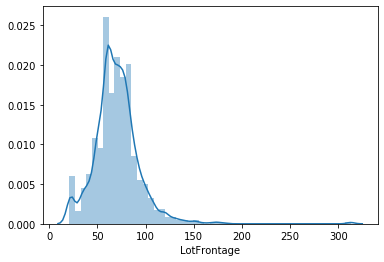

In [20]:
sns.distplot(df.LotFrontage)
plt.show()

From the above plot, we may notice that there are quote a low outliers and hence the distribution of the data is right-skewed.

In [21]:
df.LotFrontage.isnull().sum()/df.shape[0]*100

17.73972602739726

We notice that approximately 17% of the data is missing. Now since the data distribution is skewed, let's replace NA values with median value of this column.

In [22]:
df.LotFrontage.replace(np.nan,df.LotFrontage.median(),inplace=True)

In [23]:
#sanity check
df.LotFrontage.isnull().sum()

0

#### GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageCars & GarageQual

There are total 06 Garage related columns which conveys information as under:
- GarageYrBlt: Year garage was built
- GarageCond: Garage condition 
- GarageType: Garage location
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageQual: Garage quality

Here let's check the NA value counts in each of the columns.

In [24]:
garage_cols=['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']

for i in garage_cols:
    print(i)
    print(df[i].isnull().sum())
    print()

GarageYrBlt
81

GarageCond
81

GarageType
81

GarageFinish
81

GarageCars
0

GarageQual
81



In [25]:
df[df.GarageCars==0].shape[0]

81

Here we notice that all the columns have **81** NA values except **GarageCars**. **GarageCars** column has **81** 0s. It indicates that these **81** properties does not have Garage. Let's impute all the **NA** values in Garage related columns (except *GarageCars* and *GarageYrBlt*) with **No_Garage**. 


In [26]:
df.GarageCond.replace(np.nan,'No_Garage',inplace=True)
df.GarageType.replace(np.nan,'No_Garage',inplace=True)
df.GarageFinish.replace(np.nan,'No_Garage',inplace=True)
df.GarageQual.replace(np.nan,'No_Garage',inplace=True)

Further, let's keep **GarageCars** column as it is, since it does not have any **NA** values.

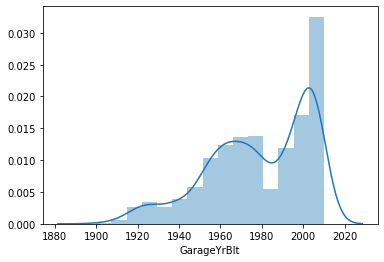

In [27]:
#check the data distribution of 'GarageYrBlt' column
sns.distplot(df.GarageYrBlt)
plt.show()

Regarding **GarageYrBlt**, this column might be a significant predictor for our model and hence we should definitely not drop it. But we have **81** NA values as described above. Dropping these 81 rows would directly impact those other Garage related columns which have the same **81** rows. We have other option which is data imputation. But imputation with mean or median (column being numeric) does not seeem a viable option here as the data distribution of this column is not normal. It has two different peaks as depicted above. Besides, Garage built year also seem dependent of year of property built year and remodelling year. Imputation with some value might create grabage data. Hence the safest option would be to get derived variable out of this column.

Let's get following driven metric out of **GarageYrBlt** column:<br>
0: NA <br>
1: GarageYrBlt<2000 (Old Garage) <br>
2: GarageYrBlt>=2000 (New Garage)  <br>
    

In [28]:
#function to get the derived metric

def func(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0


df['GarageYrBlt']=df.GarageYrBlt.apply(func)

In [29]:
#sanity check
df.GarageYrBlt.value_counts()

1    977
2    402
0     81
Name: GarageYrBlt, dtype: int64

In [30]:
#final sanity check for Garage relatd variables

garage_cols=['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']

for i in garage_cols:
    print(i)
    print(df[i].isnull().sum())
    print()

GarageYrBlt
0

GarageCond
0

GarageType
0

GarageFinish
0

GarageCars
0

GarageQual
0



#### BsmtFinType2

This column conveys the rating of basement finished area, if they are of multiple types.

In [31]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

we need to impute 'NA' with 'No_Basement'.

In [32]:
df.BsmtFinType2.replace(np.nan,'No_Basement',inplace=True)

In [33]:
#sanity check
df.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

#### BsmtExposure

This column refers to walkout or garden level walls.

In [34]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

We need to impute 'NA' with 'No_Basement'

In [35]:
df.BsmtExposure.replace(np.nan,'No_Basement',inplace=True)

In [36]:
#sanity check
df.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

#### BsmtFinType1

This column conveys rating of basement finished area.

In [37]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

We need to impute 'NA' with 'No_Basement'

In [38]:
df.BsmtFinType1.replace(np.nan,'No_Basement',inplace=True)

In [39]:
#sanity check
df.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

#### BsmtCond

This column evaluates the general condition of the basement.

In [40]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

We need to impute 'NA' with 'No_Basement'

In [41]:
df.BsmtCond.replace(np.nan,'No_Basement',inplace=True)

In [42]:
#value counts
df.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

#### BsmtQual

This columns evaluates the height of the basement.

In [43]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

We need to impute 'NA' with 'No_Basement'.

In [44]:
df.BsmtQual.replace(np.nan,'No_Basement',inplace=True)

In [45]:
#sanity check
df.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

**Basement  data anomaly alert:** <br>
From the above basement related columns, we notice that columns BsmtFinType2 and BsmtExposure conveys **38** properties does not have basement while columns BsmtFinType1, BsmtCond, BsmtQual states that **37** properties does not have basement. So certainly one or two housing property has anomalous data. Let's figure it out.

In [46]:
df[(df.BsmtFinType2=='No_Basement') & (df.BsmtExposure=='No_Basement')].shape

(37, 77)

In [47]:
df[(df.BsmtFinType2=='No_Basement')].shape

(38, 77)

In [48]:
df[(df.BsmtExposure=='No_Basement')].shape

(38, 77)

In [49]:
df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')].shape

(37, 77)

Clearly from above, we have two different corrupt rows in BsmtFinType2 & BsmtExposure. So let's drop those two rows.

In [50]:
dd1=df[(df.BsmtFinType2=='No_Basement')]

dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]

dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333.0,20.0,RL,85.0,10655.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8.0,5.0,2003.0,2004.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,No_Basement,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629.0,0.0,0.0,1629.0,1.0,0.0,2.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,2.0,RFn,3.0,880.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,WD,Normal,284000.0


In [51]:
dd1=df[(df.BsmtExposure=='No_Basement')]

dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]

dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949.0,60.0,RL,65.0,14006.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2002.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No_Basement,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936.0,840.0,0.0,1776.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,TA,Attchd,2.0,RFn,2.0,474.0,TA,TA,Y,144.0,96.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Normal,192500.0


From above we notice that rows with **Id** as **333.0** & **949.0** has erronous basement related data. So we can drop these rows.

In [52]:
df=df[(df.Id!=333.0) & (df.Id!=949.0)]

#### MasVnrArea

This column says masonry veneer area in square feet.

In [53]:
df.MasVnrArea.dtype

dtype('float64')

In [54]:
df.MasVnrArea.isnull().sum()/df.shape[0]*100

0.5486968449931412

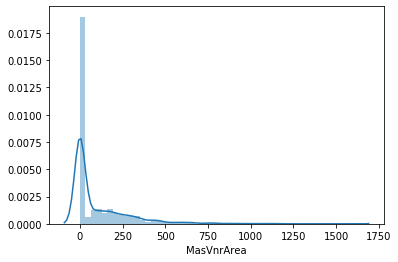

In [55]:
#check distribution plot
sns.distplot(df.MasVnrArea)
plt.show()

We can replace 'na' by median value, as distribution seems skewed.

In [56]:
df.MasVnrArea.replace(np.nan,df.MasVnrArea.median(),inplace=True)

In [57]:
#sanity check
df.MasVnrArea.isnull().sum()/df.shape[0]*100

0.0

#### MasVnrType

This column conveys masonry veneer type.

In [58]:
df.MasVnrType.value_counts()

None       864
BrkFace    443
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [59]:
#NA value percentage in this column
df.MasVnrType.isnull().sum()/df.shape[0]*100

0.5486968449931412

We can replace 'na' by 'None'

In [60]:
df.MasVnrType.replace(np.nan,'None',inplace=True)

In [61]:
#sanity check
df.MasVnrType.value_counts()

None       872
BrkFace    443
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### Electrical

This column conveys the type of Electrical system that the properties have

In [62]:
df.Electrical.value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [63]:
#NA value percentage in this column
df.Electrical.isnull().sum()

1

We have only one NA value. We can replace 'na' with mode of this column.

In [64]:
df.Electrical.replace(np.nan,df.Electrical.mode()[0],inplace=True)

In [65]:
df.Electrical.value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### 2.2 Check for those columns which are wrongly identified as numeric type but instead should be unordered categorical type
*Note that we would not change ordered categorical variables that are of numeric type.*

In [66]:
#all the numeric columns in df
df.select_dtypes(['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### MoSold

This column convey the month in which the property was sold.

In [67]:
df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      58
2      51
Name: MoSold, dtype: int64

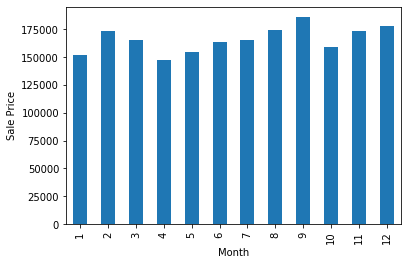

In [68]:
#check for the monthly sale price pattern
df.groupby('MoSold').SalePrice.median().plot.bar()
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

Month-sold column has been considered as numeric type. Here, we do not see any monthly price pattern. Hence it seems of no use to include it as our model predictor. So we can drop it.

In [69]:
df.drop('MoSold',axis=1,inplace=True)

#### YearBuilt, YrSold & YearRemodAdd

Here, 
- YearBuilt column indicates the year of construction of the property 
- YrSold indicates the year of selling of that particular property.
- YearRemodAdd is remodel date or same as construction date if no remodeling or additions

Let's do some sanity checks. So, **YearBuilt** should be less than **YrSold**, **YearBuilt** should be less than **YearRemodAdd** &  **YearRemodAdd** should be less than **YrSold** for obvious reasons. Let's check for any data anomaly.

In [70]:
(df.YearBuilt>df.YrSold).sum()

0

In [71]:
(df.YearRemodAdd<df.YearBuilt).sum()

0

In [72]:
(df.YearRemodAdd>df.YrSold).sum()

1

Here for one data point, we have **YearRemodAdd** more than **YrSold**, which seems irrational as all the properties have been sold after construction and/or remodelling. This is a data anomaly. So let's drop this column.

In [73]:
#check the anamalous row
print(df[df.YearRemodAdd>df.YrSold].YearRemodAdd)
print(df[df.YearRemodAdd>df.YrSold].YrSold)

523    2008
Name: YearRemodAdd, dtype: int64
523    2007
Name: YrSold, dtype: int64


In [74]:
#drop the anamalous row
df=df[df.YearRemodAdd<=df.YrSold]

The rest of the data seems legitimate. Now it seems logical to set the rule that *the older the property gets, the more depreciated seeling price it earns*. So lets get the difference between YrSold and YearBuilt and set its name as **house_age1**.

In [75]:
df['house_age1']=df.YrSold-df.YearBuilt

In [76]:
df.house_age1.describe()

count    1457.00
mean       36.62
std        30.24
min         0.00
25%         8.00
50%        35.00
75%        54.00
max       136.00
Name: house_age1, dtype: float64

Let's check relation of **house_age1** with **SalePrice** via a scatter plot.

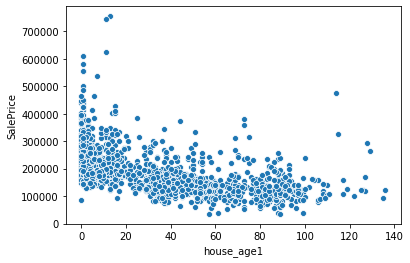

In [77]:
sns.scatterplot(x=df.house_age1,y=df.SalePrice)
plt.show()

Here we seen declining pattern in saleprice vs house_age1 plot.

It may happen that clients give priority to the year of remodelling compared to year of original construction. So now lets use **YearRemodAdd** and **YrSold** columns to get the age of the property and get its relation with **SalePrice**.

In [78]:
df['house_age2']=df.YrSold-df.YearRemodAdd

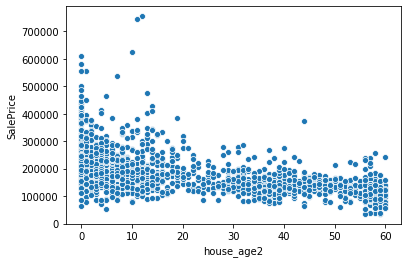

In [79]:
sns.scatterplot(df.house_age2,df.SalePrice)
plt.show()

Here we notice that **house_age2** has stronger negative relation with **SalePrice** as compared to **house_age1** column. So lets use **house_age2** for our model building. So, we can now drop **YearBuilt**, **YearRemodAdd**, **YrSold** & **house_age1** columns.

In [80]:
df.drop(['YearBuilt', 'YearRemodAdd','house_age1','YrSold'], axis=1,inplace=True)

### 2.3 check for predictors with very high percentage of any single value

In [81]:
#check for columns with more that 85% same values

cols=df.select_dtypes(['int64','float64','object']).columns

skewed_cols={}

for col in cols:
    if max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.85:
        skewed_cols[col]=round(max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)

pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())})

,Features,Percentage
0,Street,1.00
1,LandContour,0.90
2,Utilities,1.00
3,LandSlope,0.95
4,Condition1,0.86
5,Condition2,0.99
6,RoofMatl,0.98
7,ExterCond,0.88
8,BsmtCond,0.90
9,BsmtFinType2,0.86


The above dataframe shows the predictors and the corresponding percentage of only singly value. We can drop these predictors since it would not add any value in our model, being highly skewed.

In [82]:
df.drop(list(skewed_cols.keys()),axis=1,inplace=True)

### 2.4 Outlier treatment

Let's create dataframe containing predictors and the corresponding outlier percetange.

In [83]:
numeric_cols=df.select_dtypes(['int64','float64']).columns
outliers_per_dict={}

for i in numeric_cols:
    IQR=df[i].quantile(.75)-df[i].quantile(.25)
    outliers_count=df[(df[i]>(df[i].quantile(.75)+1.5*IQR)) | (df[i]<(df[i].quantile(.25)-1.5*IQR))].shape[0]
    total=df.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per

outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage
0,Id,0.00
1,MSSubClass,7.07
2,LotFrontage,7.21
3,LotArea,4.60
4,OverallQual,0.14
5,OverallCond,8.58
6,MasVnrArea,6.66
7,BsmtFinSF1,0.41
8,BsmtUnfSF,1.99
9,TotalBsmtSF,4.05


Let's try removing outliers and check what percentage of original data we are left with.

In [84]:
df2=df

for i in numeric_cols:
    IQR=df2[i].quantile(.75)-df2[i].quantile(.25)
    df2=df2[(df2[i]<(df2[i].quantile(.75)+1.5*IQR)) & (df2[i]>(df2[i].quantile(.25)-1.5*IQR))]

In [85]:
df2.shape[0]/df.shape[0]*100

58.40768702814001

So after removing outliers based in **IQR**, we are left with only **58.64%** of the original data. Here we see that there is no excess outliers in any of the numeric columns. Besides removing those outliers does not seem a wise option as the same results in significant reduction in our available data for model building.

Let's check the outliers in our response variable and check whether outlier removal help in making the same more normal.

Text(0.5, 1.0, 'Without any transformation')

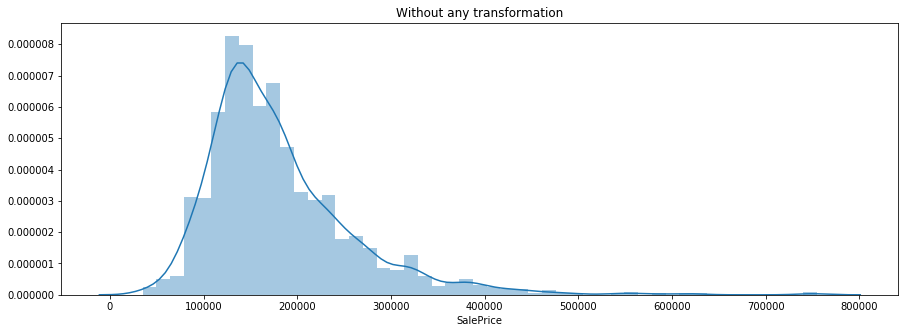

In [86]:
#plotting distribution of 'SalePrice'
plt.figure(figsize=(15,5))
sns.distplot(df['SalePrice'])
plt.title('Without any transformation')

Tranforming the skewed dependent variable by taking log and checked whether it will be normally distributed or not.

Text(0.5, 1.0, 'With log transformation')

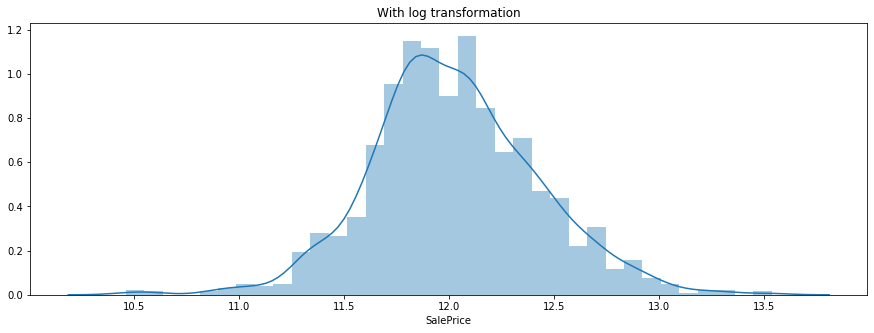

In [87]:
#plotting distribution of 'log(SalePrice)' 
plt.figure(figsize=(15,5))
sns.distplot(np.log(df['SalePrice']))
plt.title('With log transformation')

From above, we note that by applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. Hence it seem prudent to use this transfromation on **SalePrice** column for pur model building.

In [88]:
df['SalePrice']=np.log(df['SalePrice']) 

# 3. Data Visualization 

Let's check the correlation among variables and remove those independent variables with large correlation.

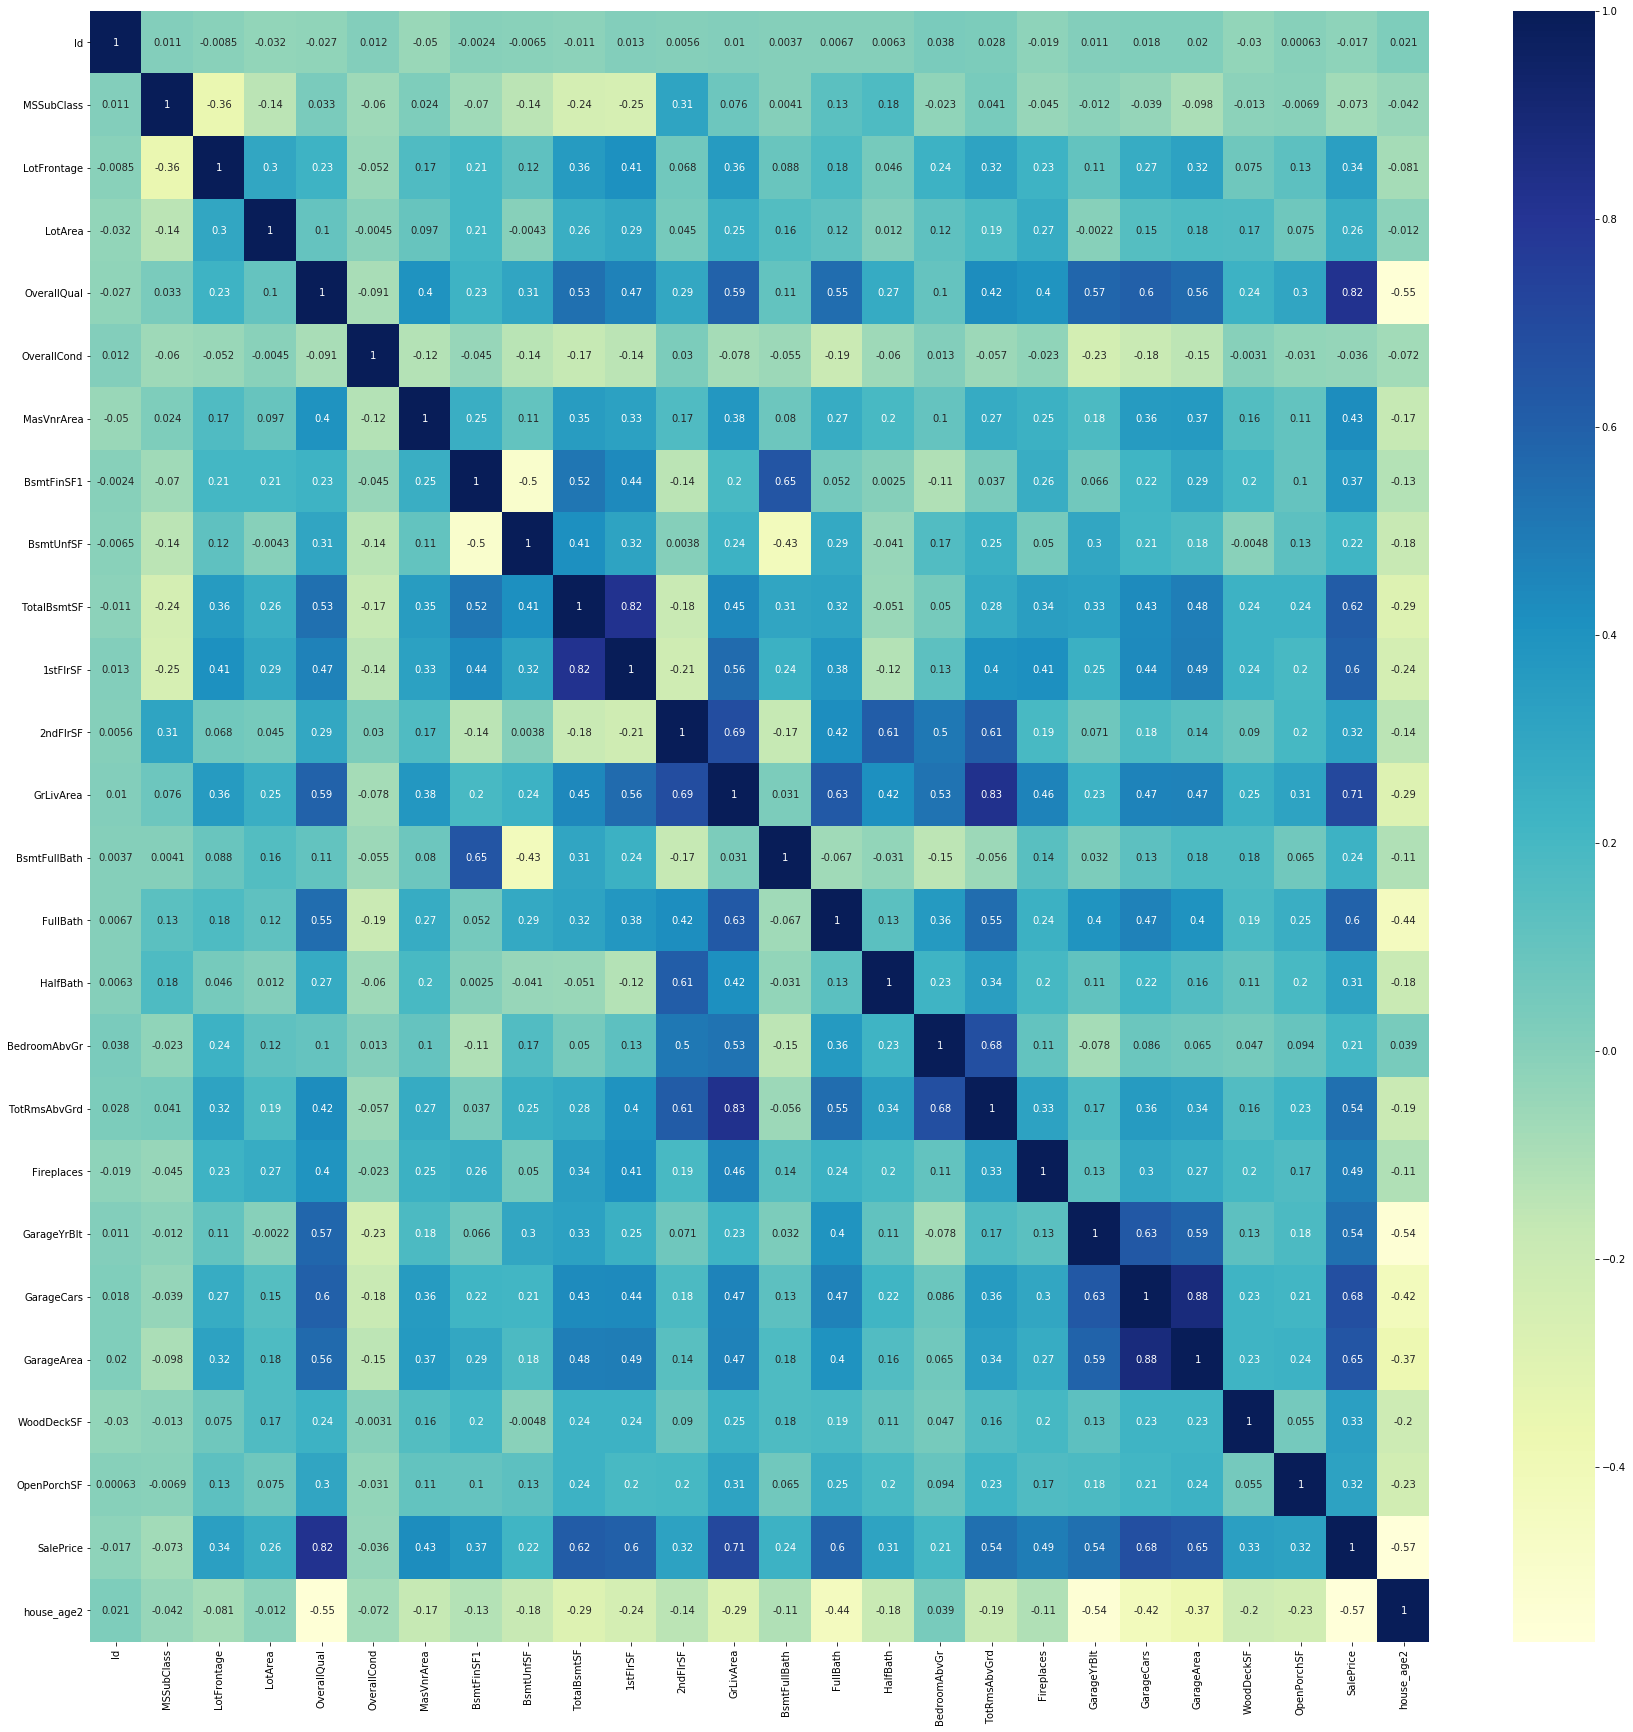

In [89]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

Here, we find following higly correlated independent variables:
- TotalBsmtSF & 1stFlrSF have 82% correlation
- TotRmsAbvGrd & GrLivArea have 83% correlation
- GarageCars & GarageArea have 88% correlation

So we have to make decision here to remove any one of the two hightly correlated variables. Let's drop **1stFlrSF, TotRmsAbvGrd and GarageArea**.


In [90]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

Now let's plot scatter plot for all numeric data with target variable `SalePrice`

In [91]:
num_col=list(df.select_dtypes(['int64','float64']))

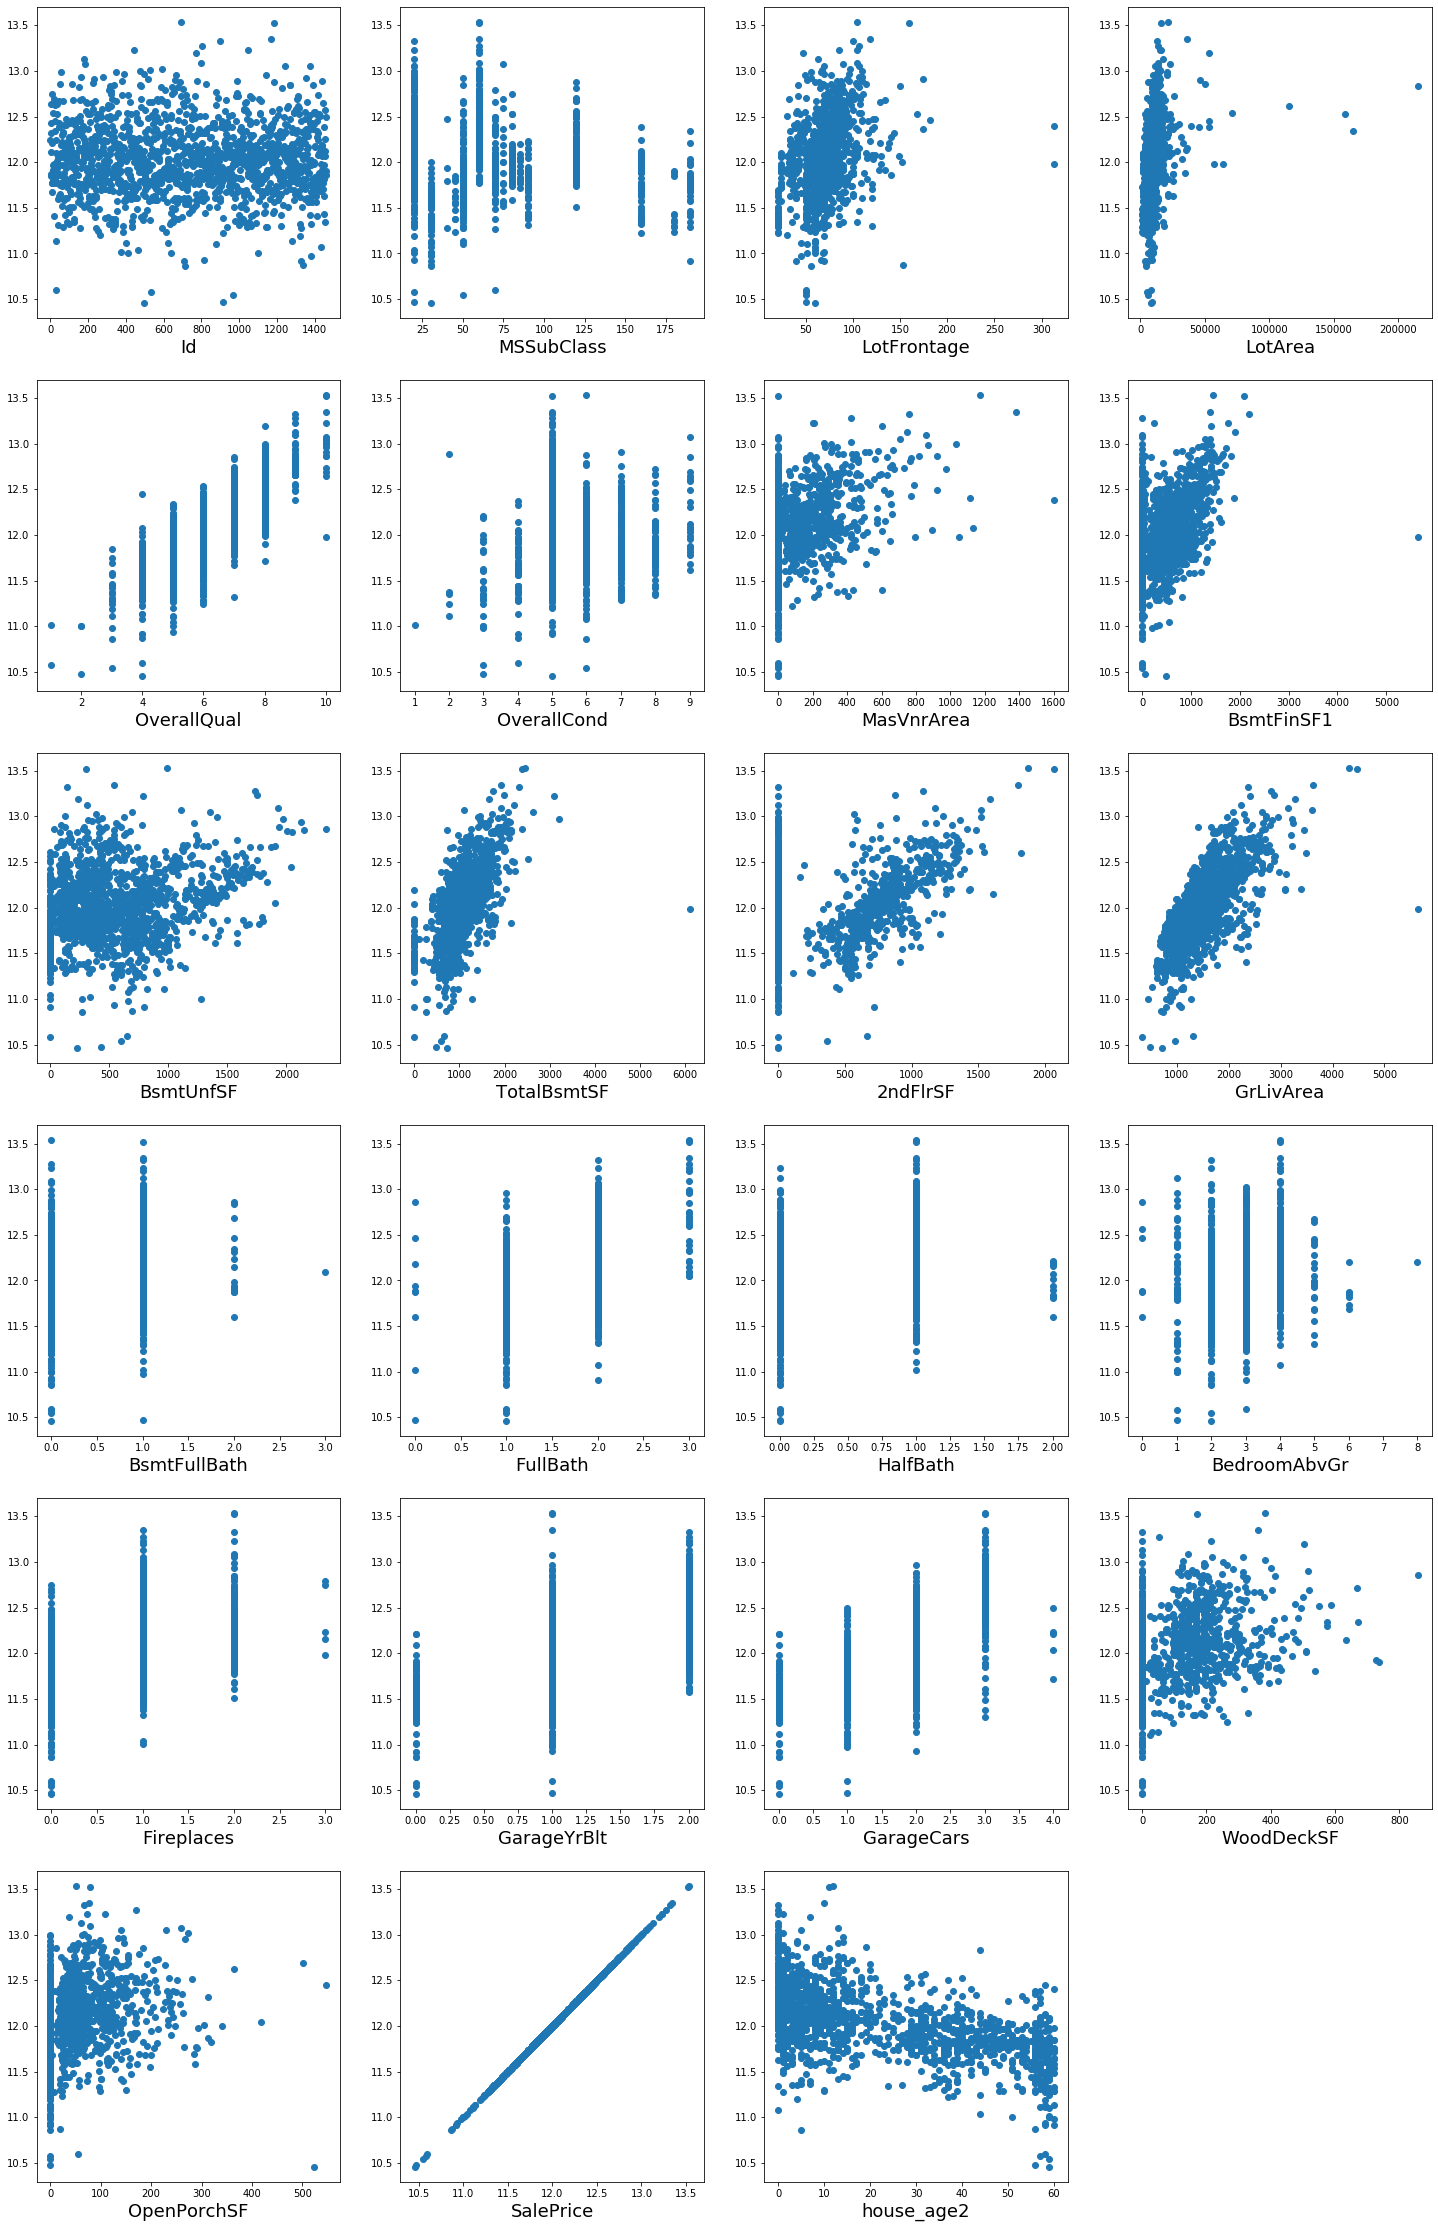

In [92]:
plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(6,4,(m+1))
    plt.scatter(df[n],df['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

We notice that many variables seems to have good positive anf negative correlation with the target variable.

Let's checkout the distribution of target variable based on different categories of categorical columns.

In [93]:
cat_col=list(df.select_dtypes('object'))

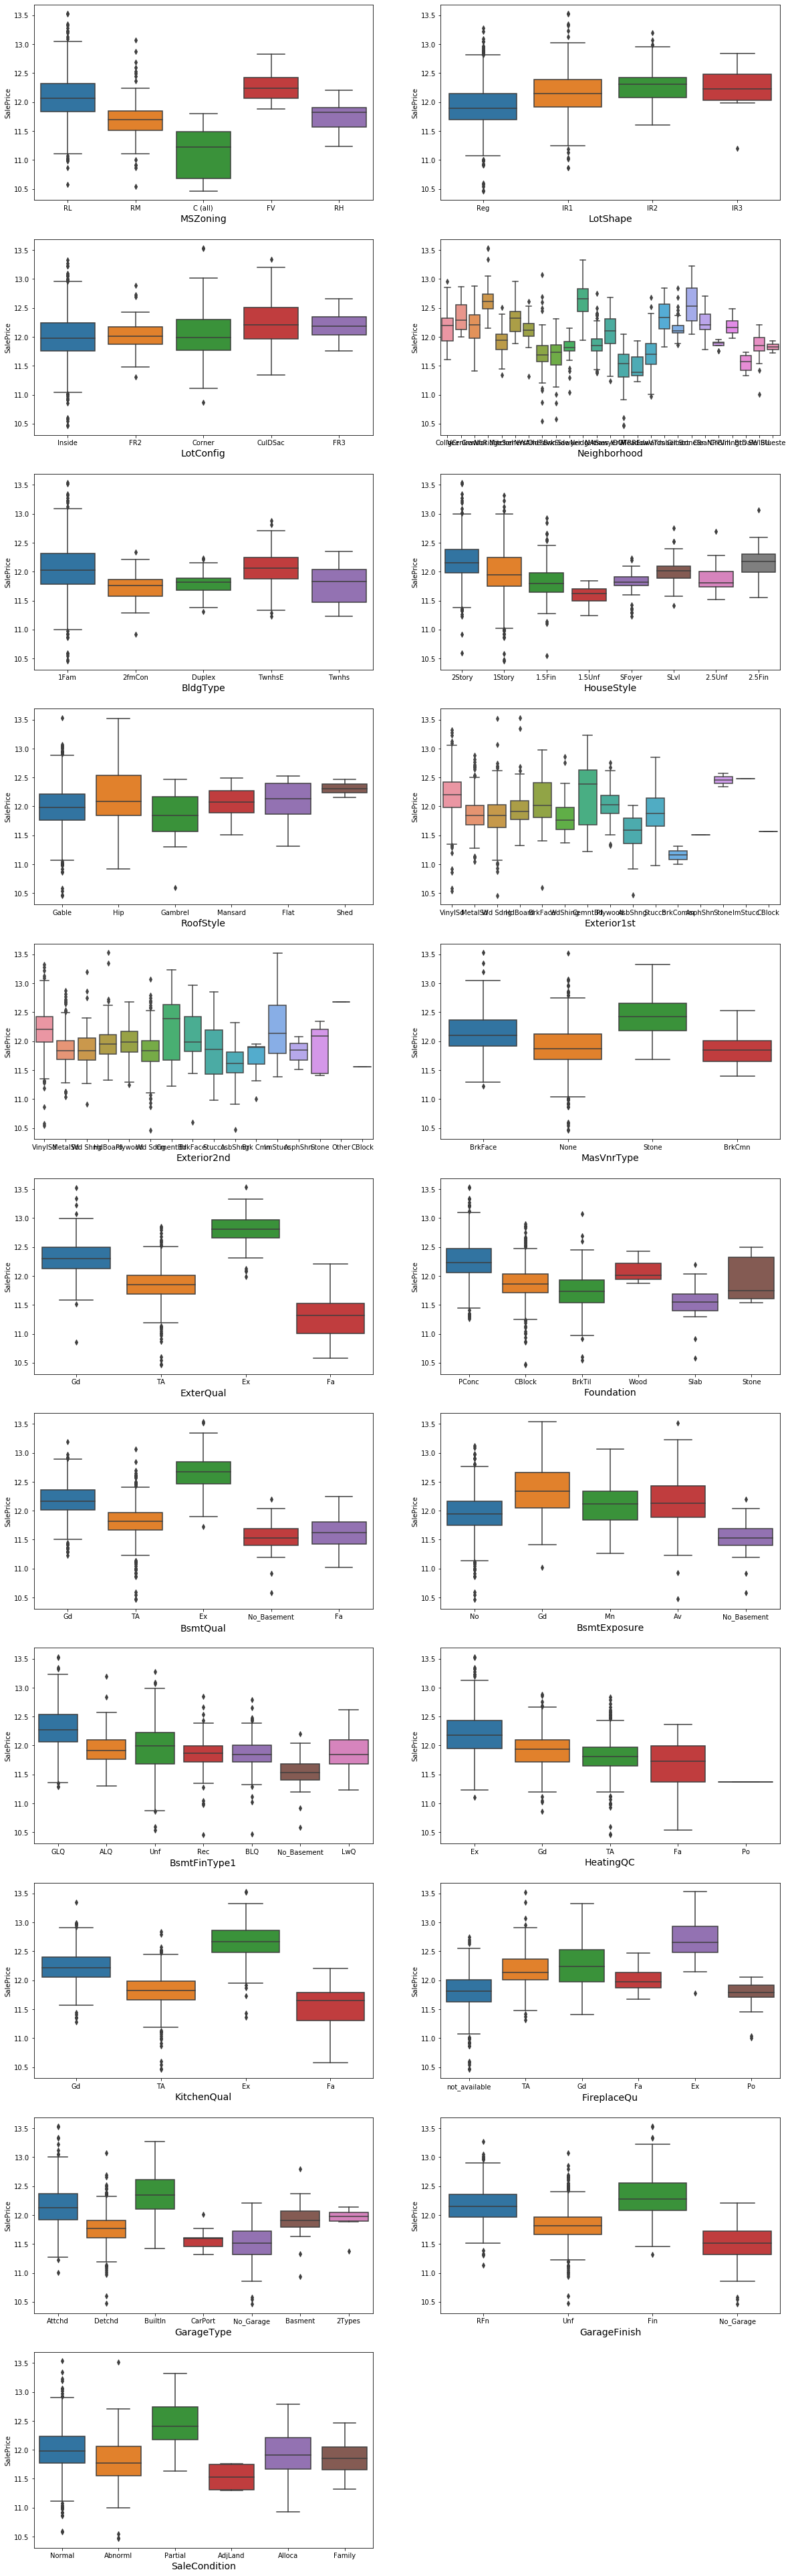

In [94]:
plt.figure(figsize=(20,70))
for m,n in enumerate(cat_col):
    plt.subplot(11,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=df)
    plt.xlabel(n, fontsize=14)
plt.show()

# 4. Data Preparation

So we know that we have total three kinds of predictor variables viz. ordered categorical, nordered categorical and numeric. It's better to convert ordered categorical variable into numeric type rather than converting them into dummies as the same may add value to our model.

In [95]:
#check for 'object' type columns
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

#### LotShape

It gives general shape of property.

In [96]:
df.LotShape.value_counts()

Reg    925
IR1    481
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [97]:
#giving different weightage by mapping based on the data dictionaty
df['LotShape']=df['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

#### ExterQual

This column evaluates the quality of the material on the exterior.

In [98]:
df.ExterQual.value_counts()

TA    906
Gd    486
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [99]:
#giving different weightage by mapping based on the data dictionaty
df['ExterQual']=df['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### BsmtQual

This column evaluates the height of the basement.

In [100]:
df.BsmtQual.value_counts()

TA             649
Gd             616
Ex             120
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [101]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtQual']=df['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No_Basement':0})

#### BsmtExposure

This column refers to walkout or garden level walls

In [102]:
df.BsmtExposure.value_counts()

No             952
Av             221
Gd             133
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [103]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtExposure']=df['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No_Basement':0})

#### BsmtFinType1

This column gives rating of basement finished area

In [104]:
df.BsmtFinType1.value_counts()

Unf            429
GLQ            416
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [105]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtFinType1']=df['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No_Basement':0})

#### HeatingQC

This column conveys about Heating quality and condition.

In [106]:
df.HeatingQC.value_counts()

Ex    738
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [107]:
#giving different weightage by mapping based on the data dictionaty
df['HeatingQC']=df['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### KitchenQual

This quality tells about Kitchen quality.

In [108]:
df.KitchenQual.value_counts()

TA    735
Gd    584
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [109]:
#giving different weightage by mapping based on the data dictionaty
df['KitchenQual']=df['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### FireplaceQu

This column conveys about Fireplace quality.

In [110]:
df.FireplaceQu.value_counts()

not_available    690
Gd               378
TA               312
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [111]:
#giving different weightage by mapping based on the data dictionaty
df['FireplaceQu']=df['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'not_available':0})

#### GarageFinish

This column is about Interior finish of the garage.

In [112]:
df.GarageFinish.value_counts()

Unf          605
RFn          420
Fin          351
No_Garage     81
Name: GarageFinish, dtype: int64

In [113]:
#giving different weightage by mapping based on the data dictionaty
df['GarageFinish']=df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No_Garage':0})

Apart from the above, there are other categorical variables which prima facie appear ordered, however we should refrain from giving them order as we are not 100% sure about it, for example, LotConfig, MasVnrType, SaleCondition, etc. The reason being that the customer's taste may vary and accordingly the price of property.

So lets create dummies for rest of the unordered categorical variables.

In [114]:
#get 'object' datatype
unordered_columns=df.select_dtypes('object').columns

In [115]:
#get dummies of object dtype columns and joining the same with main df
for i in unordered_columns:
    dum_df=pd.get_dummies(df[i],prefix=i,drop_first=True)   #enabling drop_first
    df=pd.concat([df,dum_df],axis=1)
    df.drop(i,axis=1,inplace=True)   #dropping used object dtype column

Let's drop **Id** column as the same seem of no use for model building

In [116]:
df.drop('Id',axis=1,inplace=True)

In [117]:
#check info of finally prepared dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 127 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(28), uint8(96)
memory usage: 540.8 KB


# 5. Train Test Split

#### Splitting into train and test sets

In [118]:
df_train, df_test= train_test_split(df,train_size=0.7,random_state=42)

#### Scalling the predictors 

Let's use min-max scalling to fit the predictors on df_train only. 

In [119]:
scaler=MinMaxScaler()
df_train_transformed=scaler.fit_transform(df_train)    

In [120]:
#convert the scalled data array into dataframe
df_train_transformed=pd.DataFrame(df_train_transformed, columns=df_train.columns)

In [121]:
df_test_transformed=scaler.transform(df_test)

In [122]:
#convert the scalled data array into dataframe
df_test_transformed=pd.DataFrame(df_test_transformed, columns=df_test.columns)

#### Dividing into X & y

In [123]:
y_train=df_train_transformed['SalePrice']
X_train=df_train_transformed.drop('SalePrice',axis=1)

In [124]:
y_test=df_test_transformed['SalePrice']
X_test=df_test_transformed.drop('SalePrice',axis=1)

# 6. Model Building and Evaluation

### 6.1 Linear Regression and Variance Inflation Factor for feature dropping

In [125]:
lm=LinearRegression()
lm.fit(X_train,y_train)

y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)

print('train R2 score is',(r2_score(y_train,y_train_pred)))
print('test R2 score is',(r2_score(y_test,y_test_pred)))

train R2 score is 0.9131979436166312
test R2 score is 0.8899577236537103


From above, we notice that our model with 126 independent features is highly overfitting. So lets use VIF to drop higly correlated features, if possible.

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function that creates a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_VIF_table(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [127]:
get_VIF_table(X_train)

,Features,VIF
81,Exterior1st_CBlock,inf
95,Exterior2nd_CBlock,inf
115,GarageType_Attchd,250.15
32,MSZoning_RL,208.84
89,Exterior1st_VinylSd,170.96
104,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.90
119,GarageType_Detchd,111.30
73,RoofStyle_Gable,96.51
85,Exterior1st_MetalSd,93.73


drop `Exterior2nd_CBlock`

In [128]:
X_train=X_train.drop('Exterior2nd_CBlock',axis=1)
X_test=X_test.drop('Exterior2nd_CBlock',axis=1)

In [129]:
get_VIF_table(X_train)

,Features,VIF
114,GarageType_Attchd,250.15
32,MSZoning_RL,208.84
89,Exterior1st_VinylSd,170.96
103,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.90
118,GarageType_Detchd,111.30
73,RoofStyle_Gable,96.51
85,Exterior1st_MetalSd,93.73
16,GrLivArea,90.49
98,Exterior2nd_MetalSd,84.46


drop `GarageType_Attchd`

In [130]:
X_train=X_train.drop('GarageType_Attchd',axis=1)
X_test=X_test.drop('GarageType_Attchd',axis=1)

In [131]:
get_VIF_table(X_train)

,Features,VIF
32,MSZoning_RL,185.55
89,Exterior1st_VinylSd,170.59
103,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.43
85,Exterior1st_MetalSd,93.52
73,RoofStyle_Gable,90.04
16,GrLivArea,90.01
98,Exterior2nd_MetalSd,84.46
107,MasVnrType_None,79.79
8,BsmtQual,74.33


drop `Exterior1st_VinylSd`

In [132]:
X_train=X_train.drop('Exterior1st_VinylSd',axis=1)
X_test=X_test.drop('Exterior1st_VinylSd',axis=1)

In [133]:
get_VIF_table(X_train)

,Features,VIF
32,MSZoning_RL,184.16
13,TotalBsmtSF,112.31
73,RoofStyle_Gable,90.03
16,GrLivArea,90.01
106,MasVnrType_None,79.65
8,BsmtQual,74.11
4,OverallQual,72.91
0,MSSubClass,65.41
97,Exterior2nd_MetalSd,59.29
85,Exterior1st_MetalSd,54.01


drop `MSZoning_RL`

In [134]:
X_train=X_train.drop('MSZoning_RL',axis=1)
X_test=X_test.drop('MSZoning_RL',axis=1)

In [135]:
get_VIF_table(X_train)

,Features,VIF
13,TotalBsmtSF,112.31
16,GrLivArea,89.92
72,RoofStyle_Gable,84.64
105,MasVnrType_None,77.01
8,BsmtQual,73.92
4,OverallQual,71.30
0,MSSubClass,64.93
96,Exterior2nd_MetalSd,59.10
84,Exterior1st_MetalSd,54.00
104,MasVnrType_BrkFace,40.80


Now let's check out the R2 scores on the retaininig dataset.

In [136]:
lm=LinearRegression()
lm.fit(X_train,y_train)

y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)

print('train R2 score is',(r2_score(y_train,y_train_pred)))
print('test R2 score is',(r2_score(y_test,y_test_pred)))

train R2 score is 0.9124718722677359
test R2 score is 0.8797391945658576


Still we have overfitting model, so lets use ridge and lasso regularisation on the same.

### 6.2 Ridge Regression

Let's first use Grid Search Cross Validation method to get the best value of hyperparameter alpha for ridge regression model.

In [137]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()

folds=5

ridge_model_cv=GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [138]:
cv_results= pd.DataFrame(ridge_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.59e-03,7.95e-04,1.79e-03,3.97e-04,0.0001,{'alpha': 0.0001},0.85,0.88,0.90,0.69,0.88,0.84,0.08,23,0.92,0.91,0.91,0.93,0.91,0.92,8.61e-03
1,5.19e-03,9.82e-04,1.79e-03,3.96e-04,0.001,{'alpha': 0.001},0.85,0.88,0.90,0.69,0.88,0.84,0.08,22,0.92,0.91,0.91,0.93,0.91,0.92,8.61e-03
2,4.59e-03,4.89e-04,1.20e-03,3.98e-04,0.01,{'alpha': 0.01},0.85,0.88,0.90,0.69,0.88,0.84,0.08,21,0.92,0.91,0.91,0.93,0.91,0.92,8.62e-03
3,3.99e-03,1.55e-03,1.19e-03,4.01e-04,0.1,{'alpha': 0.1},0.85,0.89,0.91,0.70,0.89,0.85,0.08,20,0.92,0.91,0.91,0.93,0.91,0.92,8.69e-03
4,6.45e-04,1.29e-03,0.00e+00,0.00e+00,0.2,{'alpha': 0.2},0.85,0.89,0.91,0.71,0.89,0.85,0.07,19,0.92,0.91,0.91,0.93,0.91,0.92,8.77e-03
5,7.53e-03,8.15e-03,7.98e-04,9.77e-04,0.3,{'alpha': 0.3},0.85,0.89,0.91,0.72,0.90,0.85,0.07,18,0.92,0.91,0.91,0.93,0.91,0.92,8.83e-03
6,3.39e-03,4.88e-04,1.20e-03,3.96e-04,0.4,{'alpha': 0.4},0.85,0.90,0.91,0.73,0.90,0.86,0.07,17,0.92,0.91,0.91,0.93,0.91,0.92,8.87e-03
7,3.98e-03,1.09e-03,1.59e-03,4.85e-04,0.5,{'alpha': 0.5},0.85,0.90,0.91,0.74,0.90,0.86,0.06,16,0.92,0.91,0.91,0.93,0.91,0.92,8.88e-03
8,2.60e-03,2.16e-03,7.99e-04,7.37e-04,0.6,{'alpha': 0.6},0.85,0.90,0.91,0.74,0.90,0.86,0.06,14,0.92,0.91,0.91,0.93,0.91,0.92,8.88e-03
9,3.13e-03,6.25e-03,3.12e-03,6.25e-03,0.7,{'alpha': 0.7},0.85,0.90,0.91,0.75,0.90,0.86,0.06,13,0.92,0.91,0.91,0.93,0.91,0.92,8.87e-03


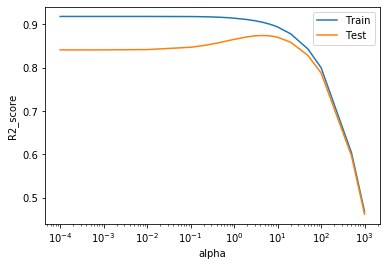

In [139]:
#plotting R2 score vs alpha value
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Let's check the model's performance on two different values of alpha i.e. 10 & 100.

In [140]:
alpha=10

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)


y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))


train R2 score is 0.89
test R2 score is 0.87


In [141]:
alpha=100

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)


y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))


train R2 score is 0.81
test R2 score is 0.79


With help of above plot we can choose the optimum value of alpha as 10. R2 score for train and test data with Ridge regularisation (alpha=10) are signifying the model is good with good bias-variance trade off.

Let's check out the coefficient values with alpha value as 10.

In [142]:
alpha=10

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

print(ridge.coef_)

[-2.45116147e-02  9.79998637e-03  2.49408716e-02 -8.10661744e-03
  9.92180774e-02  5.10684123e-02  1.92946432e-02  2.57798987e-02
  3.74675666e-02  3.19738257e-02  2.50176942e-02  1.86905756e-02
  1.97699834e-02  3.09039185e-02  1.98970139e-02  5.38850345e-02
  8.13008425e-02  2.73362128e-02  6.31267116e-02  2.95046859e-02
  3.84413884e-02  3.13688381e-02  2.51254274e-02  2.78082809e-02
  4.90280501e-03  1.42104943e-02  7.40461249e-02  2.45867885e-02
  3.27196385e-02 -2.57409073e-02  3.49275644e-03  2.49674237e-03
 -1.67292365e-02  1.55731449e-02 -1.66077341e-02 -2.39271416e-03
 -2.44890949e-03 -2.71651931e-03 -1.58504723e-03 -5.94735170e-04
  9.97090948e-03 -5.08289191e-03  3.42562316e-02 -2.59763830e-02
 -1.87544737e-02 -2.71534233e-02 -2.57515277e-02 -7.53835919e-03
 -3.87385224e-03  5.92394390e-03 -5.97538532e-03  2.72590504e-02
  2.83436630e-02 -1.73438947e-02 -7.67050470e-03 -1.47584751e-02
 -3.36747107e-03  8.66389170e-03  3.49186153e-02  5.34224131e-03
  1.91564689e-02  1.15236

We konw that unlike ridge regression, lasso regression helps in feature reduction. So, let's now see how lasso regression can help in elimination of excess features.

### 6.3 Lasso Regression

First let's use **GridSearchCV** method to get the best value of hyperparameter for lasso regression.

In [143]:
lasso=Lasso()

params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

folds=5
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [144]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.23e-02,1.70e-02,1.61e-03,8.03e-04,1e-06,{'alpha': 1e-06},8.52e-01,8.83e-01,9.05e-01,6.89e-01,8.79e-01,8.42e-01,7.80e-02,4,0.92,0.91,0.91,0.93,0.91,0.92,8.61e-03
1,2.53e-02,4.62e-03,2.19e-03,4.01e-04,1e-05,{'alpha': 1e-05},8.54e-01,8.88e-01,9.08e-01,6.97e-01,8.89e-01,8.47e-01,7.71e-02,3,0.92,0.91,0.91,0.93,0.91,0.92,8.66e-03
2,9.77e-03,7.40e-04,2.20e-03,7.49e-04,0.0001,{'alpha': 0.0001},8.67e-01,9.06e-01,9.15e-01,7.41e-01,9.17e-01,8.69e-01,6.69e-02,1,0.92,0.91,0.90,0.93,0.90,0.91,9.20e-03
3,5.98e-03,6.31e-04,1.60e-03,4.88e-04,0.001,{'alpha': 0.001},8.50e-01,8.89e-01,8.83e-01,7.97e-01,8.89e-01,8.61e-01,3.55e-02,2,0.88,0.87,0.87,0.89,0.87,0.88,8.17e-03
4,5.19e-03,1.16e-03,9.96e-04,1.55e-06,0.01,{'alpha': 0.01},5.21e-01,5.02e-01,5.03e-01,4.62e-01,5.55e-01,5.09e-01,3.02e-02,5,0.52,0.52,0.50,0.54,0.51,0.52,1.45e-02
5,4.33e-03,5.84e-03,2.00e-04,3.99e-04,0.1,{'alpha': 0.1},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
6,3.12e-03,6.25e-03,0.00e+00,0.00e+00,1,{'alpha': 1},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
7,6.25e-03,7.65e-03,0.00e+00,0.00e+00,10,{'alpha': 10},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
8,3.12e-03,6.25e-03,3.12e-03,6.25e-03,100,{'alpha': 100},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
9,3.12e-03,6.25e-03,3.12e-03,6.25e-03,500,{'alpha': 500},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00


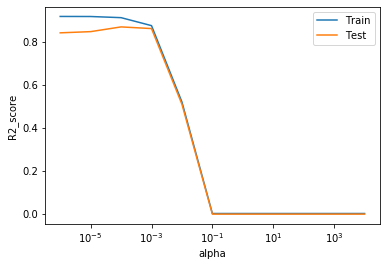

In [145]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [146]:
alph= 0.0001

lasso= Lasso(alpha=alph)

lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.89


In [147]:
alph= 0.001

lasso= Lasso(alpha=alph)

lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.87
test R2 score is 0.86


From above, alpha value of 0.001 seems a better candidate.

In [148]:
alph= 0.001

lasso= Lasso(alpha=alph)

lasso.fit(X_train, y_train)

print(lasso.coef_)

[-0.02415073  0.          0.         -0.          0.20375112  0.03467534
  0.          0.00945217  0.0287095   0.02797708  0.02678332  0.
  0.          0.          0.00960335  0.          0.27023138  0.01688812
  0.03426767  0.01110593  0.          0.02479407  0.0016921   0.03871498
  0.          0.0135689   0.10618492  0.          0.         -0.02422399
  0.         -0.         -0.03248512  0.0071445  -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
  0.00747674 -0.01079026 -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.00486233 -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.         -0.
 -0.01099961 -0.          0.         -0.          0.         -0.
 -0.          0.00974514 -0.          0.         -0.          0.
  0.          0.          0.         -0.         -0.      

In [149]:
#get dictionary containing all the variables and coefficients after lasso regression
lasso_dict=dict(zip(X_train.columns,lasso.coef_))

In [150]:
#filter dictionary for only non-zero coefficients

final_dict={}

for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits

In [151]:
final_dict

{'MSSubClass': -0.024,
 'OverallQual': 0.204,
 'OverallCond': 0.035,
 'ExterQual': 0.009,
 'BsmtQual': 0.029,
 'BsmtExposure': 0.028,
 'BsmtFinType1': 0.027,
 'HeatingQC': 0.01,
 'GrLivArea': 0.27,
 'BsmtFullBath': 0.017,
 'FullBath': 0.034,
 'HalfBath': 0.011,
 'KitchenQual': 0.025,
 'Fireplaces': 0.002,
 'FireplaceQu': 0.039,
 'GarageFinish': 0.014,
 'GarageCars': 0.106,
 'house_age2': -0.024,
 'MSZoning_RM': -0.032,
 'LotConfig_CulDSac': 0.007,
 'Neighborhood_Crawfor': 0.007,
 'Neighborhood_Edwards': -0.011,
 'Neighborhood_NridgHt': 0.005,
 'RoofStyle_Gable': -0.011,
 'Exterior1st_BrkFace': 0.01,
 'MasVnrType_None': -0.003,
 'Foundation_PConc': 0.015,
 'GarageType_Detchd': -0.007,
 'SaleCondition_Partial': 0.006}

In [152]:
len(final_dict)

29

In [153]:
#sorting the coefficient dictionary

import operator

final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))

In [154]:
#printing the final model equation

a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = 0.174+ [ 0.27 X GrLivArea + 0.204 X OverallQual + 0.106 X GarageCars + 0.039 X FireplaceQu + 0.035 X OverallCond + 0.034 X FullBath + 0.029 X BsmtQual + 0.028 X BsmtExposure + 0.027 X BsmtFinType1 + 0.025 X KitchenQual + 0.017 X BsmtFullBath + 0.015 X Foundation_PConc + 0.014 X GarageFinish + 0.011 X HalfBath + 0.01 X HeatingQC + 0.01 X Exterior1st_BrkFace + 0.009 X ExterQual + 0.007 X LotConfig_CulDSac + 0.007 X Neighborhood_Crawfor + 0.006 X SaleCondition_Partial + 0.005 X Neighborhood_NridgHt + 0.002 X Fireplaces + -0.003 X MasVnrType_None + -0.007 X GarageType_Detchd + -0.011 X Neighborhood_Edwards + -0.011 X RoofStyle_Gable + -0.024 X MSSubClass + -0.024 X house_age2 + -0.032 X MSZoning_RM ]


#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'error')

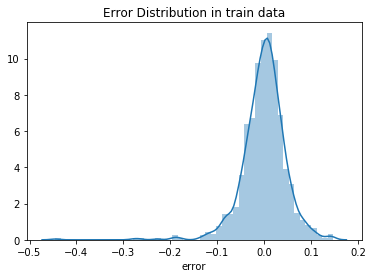

In [155]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

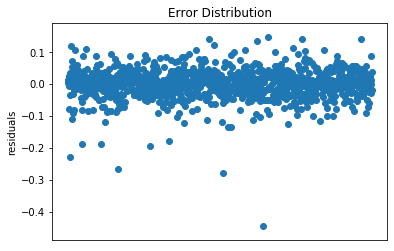

In [156]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

From above we notice that there is no heteroscedasticity in residual plot.

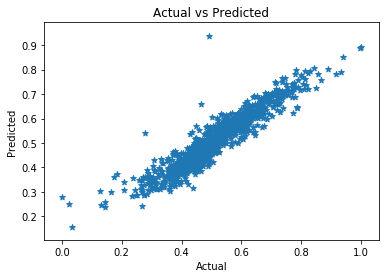

In [157]:
#plt.plot([-4,4],[-4,4], label='actual')
plt.scatter(y_train, y_train_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Here we see linear relationship between actual vs prdicted values of our target variable on train set.

#### Residual Analysis of the test data

Text(0.5, 0, 'error')

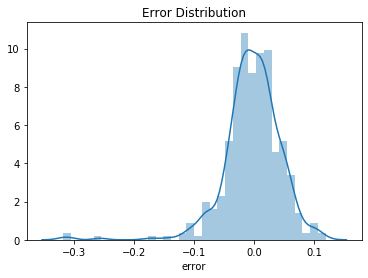

In [158]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution')
plt.xlabel('error')

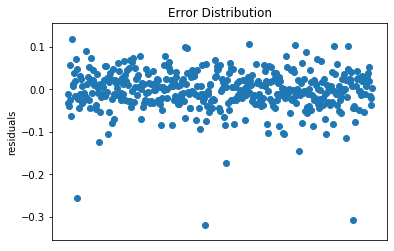

In [159]:
x= [i for i in range (1,439,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

From above as well, we notice that there is no heteroscedasticity in residual plot.

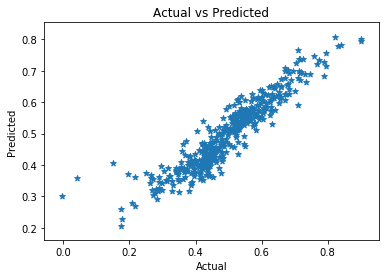

In [160]:
plt.scatter(y_test, y_test_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

So our final model equation is as under:

Sales Price = 0.161+ [ 0.271 X GrLivArea + 0.221 X GrLivArea + 0.101 X GarageCars + 0.039 X FireplaceQu + 0.037 X FullBath + 0.035 X OverallCond + 0.031 X BsmtFinType1 + 0.03 X BsmtExposure + 0.026 X BsmtQual + 0.023 X KitchenQual + 0.02 X GarageFinish + 0.012 X Foundation_PConc + 0.012 X SaleCondition_Partial + 0.01 X HeatingQC + 0.01 X BsmtFullBath + 0.01 X Exterior1st_BrkFace + 0.009 X LotConfig_CulDSac + 0.008 X Neighborhood_NridgHt + 0.006 X Neighborhood_Crawfor + 0.005 X HalfBath + 0.004 X SaleCondition_Normal + 0.002 X ExterQual + 0.001 X WoodDeckSF + 0.0 X Fireplaces + -0.0 X MasVnrType_None + -0.006 X GarageType_Detchd + -0.009 X RoofStyle_Gable + -0.011 X Neighborhood_Edwards + -0.023 X MSSubClass + -0.023 X house_age2 + -0.033 X MSZoning_RM ]

From above, we notice that:

Top 5 positive relation variable:  `GrLivArea`,  `GrLivArea`,  `GarageCars`,  `FireplaceQu`, `FullBath`

Top 3 negative relation variable:  `MSZoning_RM`,  `house_age2`, `MSSubClass`



---------------------------------------------------------------------------------------------------------------------------

# 7. Problem Statement - Part II

### Question 1

In [161]:
print('Optimal value of alpha for Ridge regression: 10')
print('Optimal value of alpha for Lasso regression: 0.001')

Optimal value of alpha for Ridge regression: 10
Optimal value of alpha for Lasso regression: 0.001


Now let's checkout the R2 scores.

In [162]:
alpha=10

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)


y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score in ridge is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score ridge is',round(r2_score(y_test,y_test_pred),2))


train R2 score in ridge is 0.89
test R2 score ridge is 0.87


In [163]:
alpha= 0.001

lasso= Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('train R2 score lasso is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score lasso is',round(r2_score(y_test,y_test_pred),2))

train R2 score lasso is 0.87
test R2 score lasso is 0.86


Let's checkout the predictors and the corresponding magnitude of coefficients for the above optimal values of alpha for ridge (alpha=10) and lasso (alpha=0.001) regression.

In [164]:
df_Q1_1=pd.DataFrame({'Features':X_train.columns,
                      'Ridge_parameters':[np.abs(x) for x in ridge.coef_],
                      'Lasso_parameters':[np.abs(x) for x in lasso.coef_] })
df_Q1_1

,Features,Ridge_parameters,Lasso_parameters
0,MSSubClass,2.45e-02,2.42e-02
1,LotFrontage,9.80e-03,0.00e+00
2,LotArea,2.49e-02,0.00e+00
3,LotShape,8.11e-03,0.00e+00
4,OverallQual,9.92e-02,2.04e-01
5,OverallCond,5.11e-02,3.47e-02
6,MasVnrArea,1.93e-02,0.00e+00
7,ExterQual,2.58e-02,9.45e-03
8,BsmtQual,3.75e-02,2.87e-02
9,BsmtExposure,3.20e-02,2.80e-02


Let's check the most important variables for Ridge regression before doubling the alphas.

In [165]:
df_Q1_1.sort_values('Ridge_parameters',ascending=False).head(5).Features

4     OverallQual
16      GrLivArea
26     GarageCars
18       FullBath
15       2ndFlrSF
Name: Features, dtype: object

Let's check the most important variables for Lasso regression before doubling the alphas.

In [166]:
df_Q1_1.sort_values('Lasso_parameters',ascending=False).head(5).Features

16      GrLivArea
4     OverallQual
26     GarageCars
23    FireplaceQu
5     OverallCond
Name: Features, dtype: object

In [167]:
#no. of non-zero coefficient in lasso

df_Q1_1[df_Q1_1.Lasso_parameters!=0].shape[0]

29

Now, let's double the optimal alpha parameters in both the regressions and check the corresponding R2 scores.

In [168]:
alpha=10*2

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)


y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('train R2 score in ridge is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score ridge is',round(r2_score(y_test,y_test_pred),2))


train R2 score in ridge is 0.88
test R2 score ridge is 0.85


In [169]:
alpha= 0.001*2

lasso= Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('train R2 score lasso is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score lasso is',round(r2_score(y_test,y_test_pred),2))

train R2 score lasso is 0.84
test R2 score lasso is 0.82


Let's check the corresponding feature coefficient's magnitude.

In [170]:
df_Q1_2=pd.DataFrame({'Features':X_train.columns, 
                      'Ridge_parameters':[np.abs(x) for x in ridge.coef_] ,
                      'Lasso_parameters':[np.abs(x) for x in lasso.coef_]})
df_Q1_2

,Features,Ridge_parameters,Lasso_parameters
0,MSSubClass,2.29e-02,6.08e-03
1,LotFrontage,1.17e-02,0.00e+00
2,LotArea,1.67e-02,0.00e+00
3,LotShape,1.06e-02,0.00e+00
4,OverallQual,7.59e-02,2.09e-01
5,OverallCond,3.92e-02,0.00e+00
6,MasVnrArea,1.87e-02,0.00e+00
7,ExterQual,2.88e-02,0.00e+00
8,BsmtQual,3.36e-02,8.99e-03
9,BsmtExposure,3.22e-02,2.24e-02


In [171]:
#no. of non zero coefficients in lasso
df_Q1_2[df_Q1_2.Lasso_parameters!=0].shape[0]

20

Observations:
- `R2 score`: Upon doubling the values of alpha in both the Ridge and Lasso regressions, the corresponding R2 scores decreases. The difference between training and test R2 scores does not become significant after doubling the alpha hyperparameter though. 
- `Coefficients`: We notice the reduction in the coefficient values in both the ridge and lasso regressions, upon doubling the alpha hyperparameter. That clearly indicates that both the regressions are applying regularization more rigorously, upon increasing alpha values.

Let's check the most important variables for Ridge regression after doubling the alphas.

In [172]:
df_Q1_2.sort_values('Ridge_parameters',ascending=False).head(5).Features

4     OverallQual
26     GarageCars
16      GrLivArea
18       FullBath
15       2ndFlrSF
Name: Features, dtype: object

Let's check the most important variables for Lasso regression after doubling the alphas.

In [173]:
df_Q1_2.sort_values('Lasso_parameters',ascending=False).head(5).Features

4     OverallQual
16      GrLivArea
26     GarageCars
23    FireplaceQu
21    KitchenQual
Name: Features, dtype: object

---------------------------------------------------------------------------------------------------------------------------

### Question 3

Let's first check for the five most important features from lasso regression based on our original cleaned dataset.

In [174]:
alpha= 0.001

lasso= Lasso(alpha=alpha)

lasso.fit(X_train, y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [175]:
df_coef=pd.DataFrame({'Features':X_train.columns,'Lasso_parameters':[np.abs(x) for x in lasso.coef_]})
df_coef.sort_values('Lasso_parameters',ascending=False).Features.head(5)

16      GrLivArea
4     OverallQual
26     GarageCars
23    FireplaceQu
5     OverallCond
Name: Features, dtype: object

From above, we note that the top 5 features are those with top 5 magnitudes of their respective coefficient. Here we have also taken negative values into account.

Now, let's drop these top 05 values and build model again.

In [176]:
drop_var=list(df_coef.sort_values('Lasso_parameters',ascending=False).Features.head(5))

X_train_Q3=X_train.drop(drop_var,axis=1)
X_test_Q3=X_test.drop(drop_var,axis=1)

In [177]:
params= {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso= Lasso()

model_cv= GridSearchCV(lasso, params, scoring= 'r2', cv=5, return_train_score= True)

model_cv.fit(X_train_Q3, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [178]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.53e-03,6.87e-03,3.31e-03,6.14e-03,0.0001,{'alpha': 0.0001},8.41e-01,8.71e-01,8.63e-01,6.61e-01,8.54e-01,8.18e-01,7.91e-02,1,0.88,0.88,0.88,0.90,0.88,0.88,9.88e-03
1,3.12e-03,6.25e-03,6.25e-03,7.65e-03,0.001,{'alpha': 0.001},8.03e-01,8.48e-01,8.10e-01,7.22e-01,8.34e-01,8.03e-01,4.40e-02,2,0.83,0.82,0.82,0.85,0.83,0.83,1.01e-02
2,6.25e-03,7.65e-03,0.00e+00,0.00e+00,0.01,{'alpha': 0.01},4.82e-01,4.84e-01,4.09e-01,4.06e-01,5.17e-01,4.59e-01,4.44e-02,3,0.47,0.47,0.45,0.50,0.47,0.47,1.58e-02
3,4.59e-03,2.49e-03,1.80e-03,9.77e-04,0.1,{'alpha': 0.1},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
4,4.78e-03,7.49e-04,1.79e-03,4.00e-04,1,{'alpha': 1},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
5,4.79e-03,1.32e-03,1.59e-03,4.88e-04,10,{'alpha': 10},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
6,3.59e-03,1.85e-03,1.04e-03,7.01e-04,100,{'alpha': 100},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
7,6.25e-03,7.65e-03,0.00e+00,0.00e+00,500,{'alpha': 500},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
8,6.25e-03,7.65e-03,0.00e+00,0.00e+00,1000,{'alpha': 1000},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00
9,6.25e-03,7.65e-03,0.00e+00,0.00e+00,10000,{'alpha': 10000},-8.16e-05,-5.21e-03,-2.59e-03,-4.36e-03,-1.88e-03,-2.83e-03,1.82e-03,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00


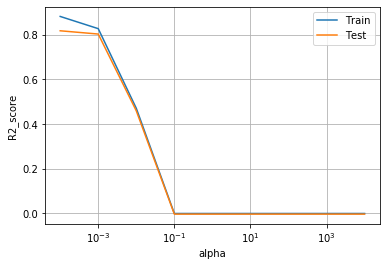

In [179]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

From the above graph, we note that the optimal value of alpha is 0.001. So let's built our lasso regrssion upon the same.

In [180]:
alph= 0.001

lasso= Lasso(alpha=alph)

lasso.fit(X_train_Q3, y_train)

y_train_pred= lasso.predict(X_train_Q3)
y_test_pred= lasso.predict(X_test_Q3)

print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.82
test R2 score is 0.8


Now let's get the top 5 features again.

In [181]:
df_coef=pd.DataFrame({'Features':X_train_Q3.columns,'Lasso_parameters':[np.abs(x) for x in lasso.coef_]})
out_list=df_coef.sort_values('Lasso_parameters',ascending=False).Features.head(5)

print('Top 05 features obtained after lasso regularizartion, after dropping the original top 05 features are as under:')
print(list(out_list))
    

Top 05 features obtained after lasso regularizartion, after dropping the original top 05 features are as under:
['FullBath', 'Fireplaces', '2ndFlrSF', 'KitchenQual', 'BsmtQual']


---------------------------------------------------------------------------------------------------------------------------